In [1]:
import numpy as np
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline

In [2]:
def func(x, a,b):
    return b/(x**a)

def toy_samp_(cv,M,sim_num=30):
    n_genes=20000
    n_cells = M.shape[0]
    x_=np.linspace(1,n_genes, n_genes+1)
    f_mean=func(x_,0.8,1)/np.sum(func(x_,0.8,1))
    fake_organ=np.zeros((n_genes,n_cells,sim_num)).astype('float32')
    f=np.zeros((n_genes,n_cells,sim_num)).astype('float32')
    for z in range(sim_num):
        for i in range(n_genes)[:]:
            mu= f_mean[i]
            std = cv * mu
            var=std**2
            shape = mu**2/var
            scale= var/mu
            if not math.isinf(shape):
                N_ =np.random.gamma(shape,scale, size=(1,n_cells))
                f[i,:,z]=N_
        rs = np.random.RandomState(seed=42)
        for c in range(n_cells)[:]:
            p = f[:,c,z]/(f[:,c,z].sum(axis=0))
            fake_raw=np.mean(np.random.multinomial(M[c], p, size=1),axis=0) 
            fake_organ[:,c,z]= np.array(fake_raw)

    toy_samp= fake_organ
    return toy_samp

In [3]:
cv=0.3
M_min,M_max=20000,30000
M = np.logspace(np.log10(M_min),np.log10(M_max),2000)
toy_samp=toy_samp_(cv,M)

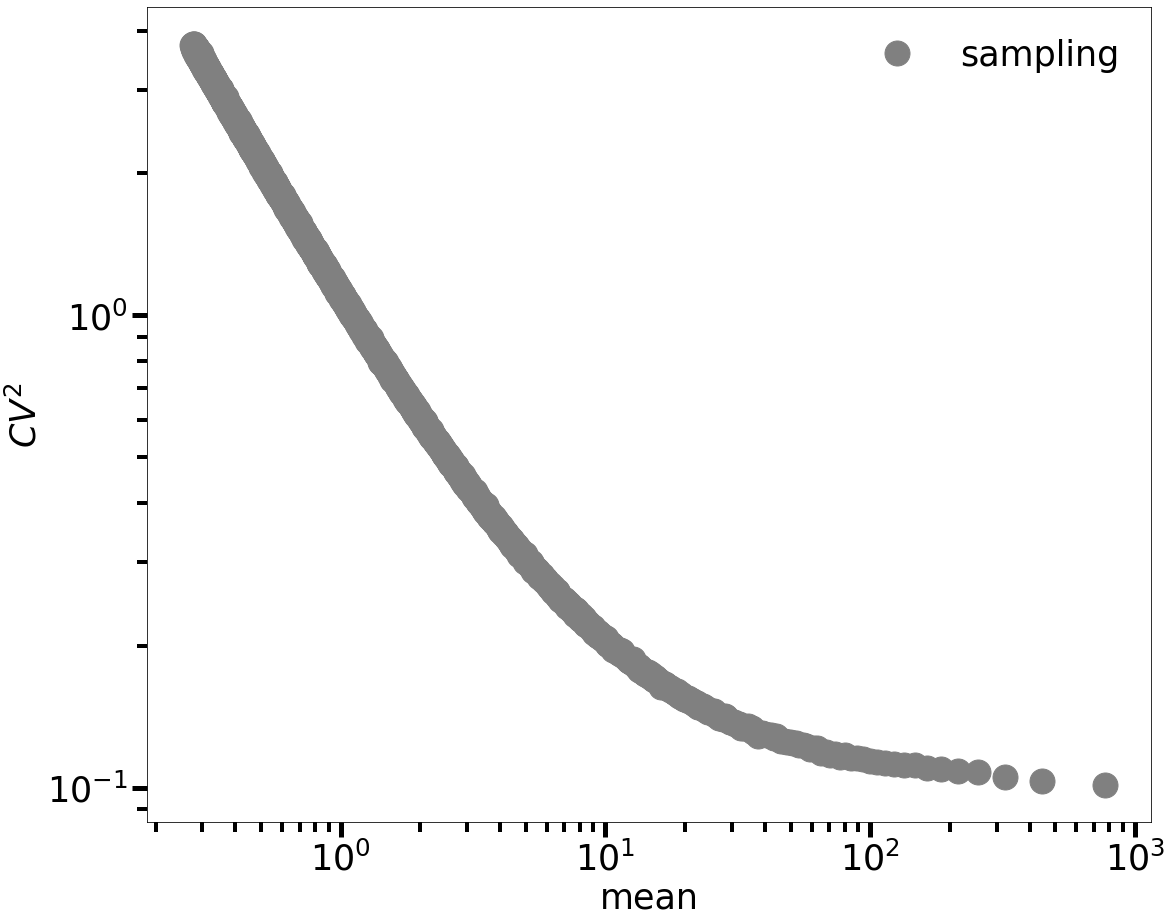

In [19]:
fig, ax = plt.subplots(figsize=(18,15))
cv2_samp=((toy_samp.std(axis=1)))**2/((toy_samp.mean(axis=1)))**2
plt.plot((toy_samp.mean(axis=1)).mean(axis=1), cv2_samp.mean(axis=1),'o', color='gray', label='sampling'.format(cv), ms=25)

plt.legend(frameon=False, loc='upper right', fontsize=35)
plt.xlabel('mean',fontsize=35)
plt.ylabel('$CV^2$',fontsize=35)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='minor', labelsize=30,width=4,length=10)
ax.tick_params(axis='both',width=5,length=15)
plt.savefig('/media/silvia/Maxtor/DATA/NULLMODEL2.0/IMPLEMENTATION/Figures/CV2.pdf', bbox_inches='tight')

In [6]:
h_means=[]
h_var=[]
for i in range(10):  
    h_means.append(binned_statistic(M, ((toy_samp>0).sum(axis=0))[:,i], statistic='mean', bins=np.logspace(np.log10(M_min),np.log10(M_max),15), range=None)[0])
    h_var.append((binned_statistic(M, ((toy_samp>0).sum(axis=0))[:,i], statistic='std', bins=np.logspace(np.log10(M_min),np.log10(M_max),15), range=None)[0])**2)

In [7]:
h_var=np.array(h_var)
h_means=np.array(h_means)

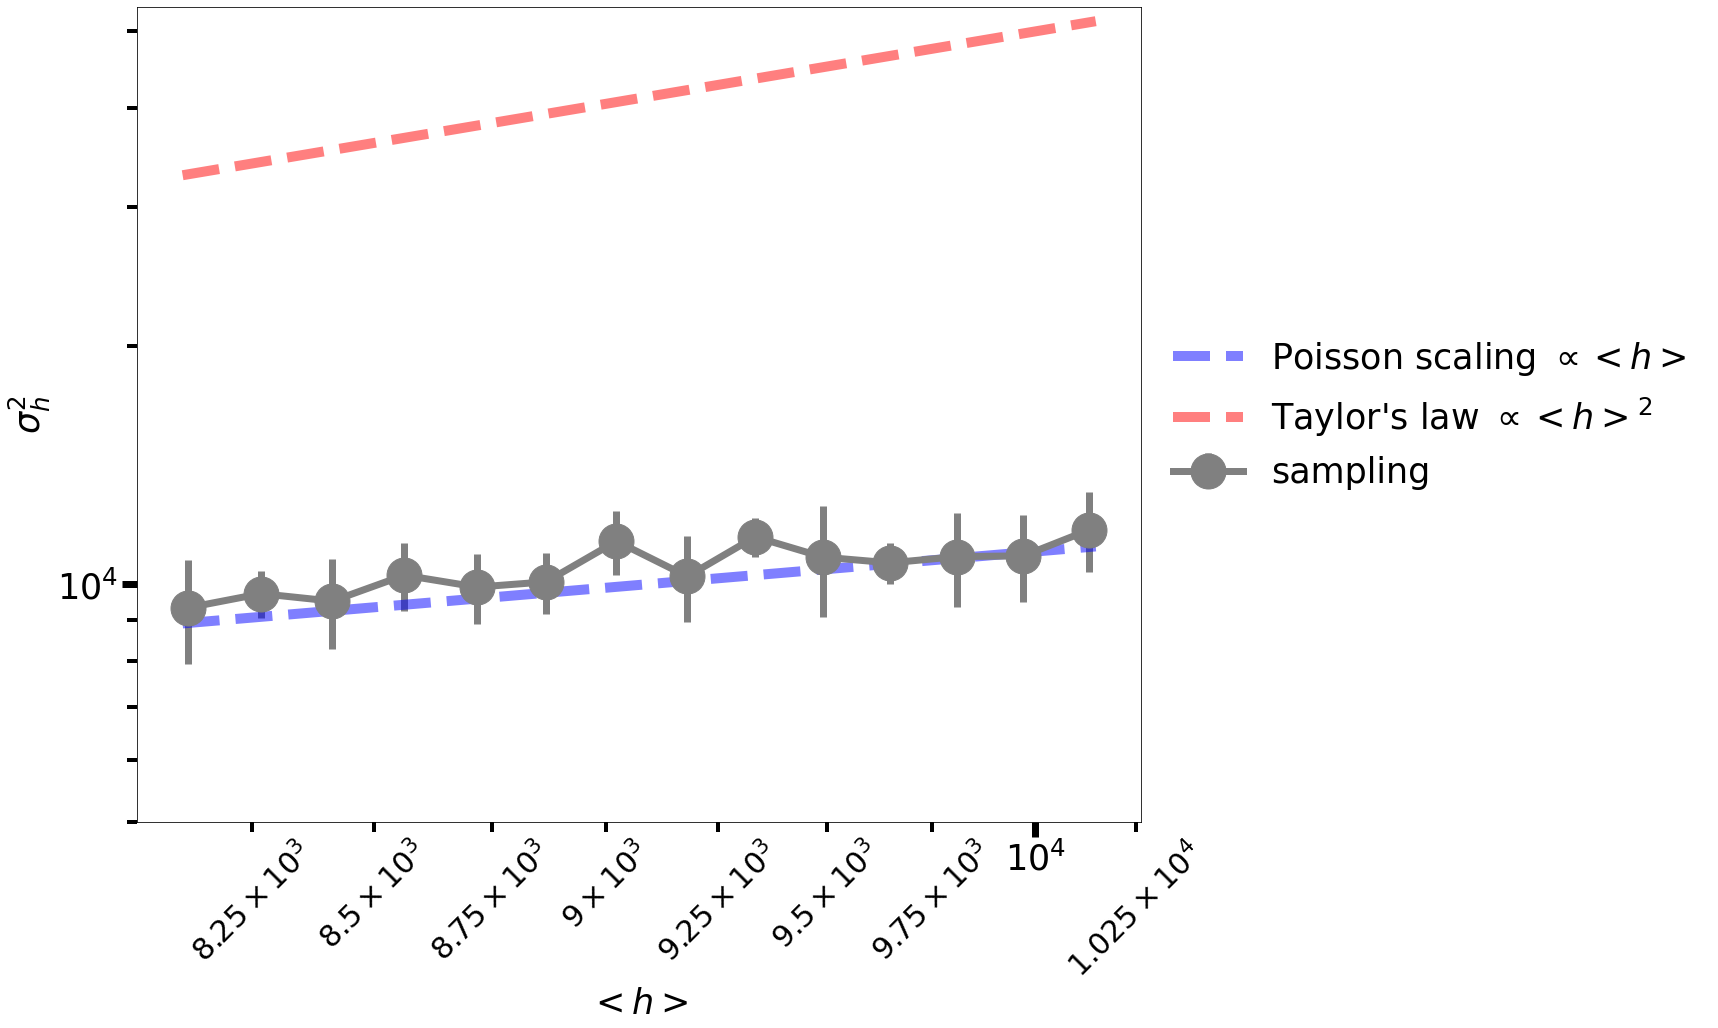

In [21]:
fig, ax = plt.subplots(figsize=(18,15))
plt.errorbar(h_means.mean(axis=0),h_var.mean(axis=0),yerr=h_var.std(axis=0),marker='o', label='sampling', color='gray', ms=35,lw=7)
plt.plot(np.logspace(np.log10(h_means.min()),np.log10(h_means.max()),100), np.logspace(np.log10(h_means.min()),np.log10(h_means.max()),100)*1.1,'--',color='blue',alpha=0.5,lw=10,label='Poisson scaling $ \propto <h>$ ')
plt.plot(np.logspace(np.log10(h_means.min()),np.log10(h_means.max()),100), ((np.logspace(np.log10(h_means.min()),np.log10(h_means.max()),100))**2)*1/2000,'--', color='red', alpha=0.5,lw=10, label="Taylor's law $ \propto <h>^2$")
plt.legend(frameon=False, bbox_to_anchor=(1, .5), loc='center left', fontsize=35)
plt.ylim(bottom=0.5*10**4)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\sigma^2_h$',fontsize=35)
plt.xlabel('$<h>$', fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='minor', labelsize=30,width=4,length=10, rotation=45)
ax.tick_params(axis='both',width=7,length=15)
plt.savefig('/media/silvia/Maxtor/DATA/NULLMODEL2.0/IMPLEMENTATION/Figures/h_fluctuations.pdf', bbox_inches='tight')